In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
%matplotlib inline

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

rcv = RandomizedSearchCV(KNeighborsClassifier(), {
    "n_neighbors": [3,5,2,10,15,20]
}, cv=5, return_train_score=False, n_iter=4)

rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=4,
                   param_distributions={'n_neighbors': [3, 5, 2, 10, 15, 20]})

In [9]:
rcv.best_params_

{'n_neighbors': 5}

In [10]:
rcv.best_score_

0.9866391298361558

In [12]:
pd.DataFrame(rcv.cv_results_)[["params", "mean_test_score", "param_n_neighbors"]]

,params,mean_test_score,param_n_neighbors
0,{'n_neighbors': 20},0.966601,20
1,{'n_neighbors': 5},0.986639,5
2,{'n_neighbors': 15},0.967344,15
3,{'n_neighbors': 10},0.976990,10


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_test, y_test)

0.9822222222222222

In [15]:
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

Text(69.0, 0.5, 'Truth')

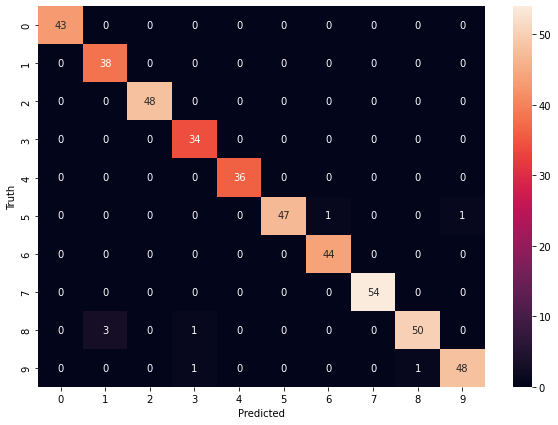

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")